# 4.3 Data preprocessing, feature engineering,and feature learning

In addition to model evaluation, an important question we must tackle before we dive
deeper into model development is the following: how do you prepare the input data
and targets before feeding them into a neural network? Many data-preprocessing and
feature-engineering techniques are domain specific (for example, specific to text data
or image data); we’ll cover those in the following chapters as we encounter them in
practical examples. For now, we’ll review the basics that are common to all data
domains.

## 4.3.1 Data preprocessing for neural networks

Data preprocessing aims at making the raw data at hand more amenable to neural
networks. This includes vectorization, normalization, handling missing values, and
feature extraction.

### VECTORIZATION

All inputs and targets in a neural network must be tensors of floating-point data (or, in
specific cases, tensors of integers). Whatever data you need to process—sound,
images, text—you must first turn into tensors, a step called __data vectorization__. For
instance, in the two previous text-classification examples, we started from text represented
as lists of integers (standing for sequences of words), and we used one-hot
encoding to turn them into a tensor of __float32__ data. In the examples of classifying
digits and predicting house prices, the data already came in vectorized form, so you
were able to skip this step.

### VALUE NORMALIZATION

In the digit-classification example, you started from image data encoded as integers in
the 0–255 range, encoding grayscale values. Before you fed this data into your network,
you had to cast it to __float32__ and divide by 255 so you’d end up with floatingpoint
values in the 0–1 range. Similarly, when predicting house prices, you started
from features that took a variety of ranges—some features had small floating-point values,
others had fairly large integer values. Before you fed this data into your network,
you had to normalize each feature independently so that it had a standard deviation
of 1 and a mean of 0.

In general, it isn’t safe to feed into a neural network data that takes relatively large values
(for example, multidigit integers, which are much larger than the initial values taken
by the weights of a network) or data that is heterogeneous (for example, data where one
feature is in the range 0–1 and another is in the range 100–200). Doing so can trigger
large gradient updates that will prevent the network from converging. To make learning
easier for your network, your data should have the following characteristics:
* __Take small values__—Typically, most values should be in the 0–1 range.
* __Be homogenous__—That is, all features should take values in roughly the same range.

Additionally, the following stricter normalization practice is common and can help,
although it isn’t always necessary (for example, you didn’t do this in the digit-classification
example):
* Normalize each feature independently to have a mean of 0.
* Normalize each feature independently to have a standard deviation of 1.

In [1]:
# This is easy to do with Numpy arrays:
# x -= x.mean(axis=0)
# x /= x.std(axis=0)

### HANDLING MISSING VALUES

You may sometimes have missing values in your data. For instance, in the house-price
example, the first feature (the column of index 0 in the data) was the per capita crime
rate. What if this feature wasn’t available for all samples? You’d then have missing values
in the training or test data.

In general, with neural networks, it’s safe to input missing values as 0, with the condition
that 0 isn’t already a meaningful value. The network will learn from exposure to
the data that the value 0 means missing data and will start ignoring the value.

Note that if you’re expecting missing values in the test data, but the network was
trained on data without any missing values, the network won’t have learned to ignore
missing values! In this situation, you should artificially generate training samples with
missing entries: copy some training samples several times, and drop some of the features
that you expect are likely to be missing in the test data.

## 4.3.2 Feature engineering

__Feature engineering__ is the process of using your own knowledge about the data and about
the machine-learning algorithm at hand (in this case, a neural network) to make the
algorithm work better by applying
hardcoded (nonlearned) transformations
to the data before it goes
into the model. In many cases, it isn’t
reasonable to expect a machinelearning
model to be able to learn
from completely arbitrary data. The
data needs to be presented to the
model in a way that will make the
model’s job easier.

Let’s look at an intuitive example.
Suppose you’re trying to develop a
model that can take as input an
image of a clock and can output the
time of day.
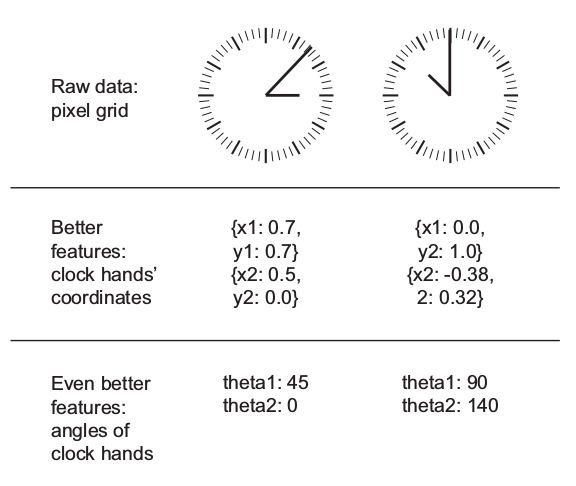

If you choose to use the raw pixels of the image as input data, then you have a difficult
machine-learning problem on your hands. You’ll need a convolutional neural network
to solve it, and you’ll have to expend quite a bit of computational resources to
train the network.

But if you already understand the problem at a high level (you understand how
humans read time on a clock face), then you can come up with much better input features
for a machine-learning algorithm: for instance, it’s easy to write a five-line
Python script to follow the black pixels of the clock hands and output the (x, y) coordinates
of the tip of each hand. Then a simple machine-learning algorithm can learn
to associate these coordinates with the appropriate time of day.

You can go even further: do a coordinate change, and express the (x, y) coordinates
as polar coordinates with regard to the center of the image. Your input will
become the angle theta of each clock hand. At this point, your features are making
the problem so easy that no machine learning is required; a simple rounding operation
and dictionary lookup are enough to recover the approximate time of day.

That’s the essence of feature engineering: making a problem easier by expressing
it in a simpler way. It usually requires understanding the problem in depth.

Before deep learning, feature engineering used to be critical, because classical
shallow algorithms didn’t have hypothesis spaces rich enough to learn useful features
by themselves. The way you presented the data to the algorithm was essential to its success.
For instance, before convolutional neural networks became successful on the
MNIST digit-classification problem, solutions were typically based on hardcoded features
such as the number of loops in a digit image, the height of each digit in an
image, a histogram of pixel values, and so on.

Fortunately, modern deep learning removes the need for most feature engineering,
because neural networks are capable of automatically extracting useful features
from raw data. Does this mean you don’t have to worry about feature engineering as
long as you’re using deep neural networks? No, for two reasons:
* Good features still allow you to solve problems more elegantly while using fewer resources. For instance, it would be ridiculous to solve the problem of reading a clock face using a convolutional neural network.
* Good features let you solve a problem with far less data. The ability of deeplearning models to learn features on their own relies on having lots of training data available; if you have only a few samples, then the information value in their features becomes critical.